<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Monthly-Snapshots" data-toc-modified-id="Monthly-Snapshots-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Monthly Snapshots</a></span></li><li><span><a href="#Weekly-Snapshots" data-toc-modified-id="Weekly-Snapshots-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Weekly Snapshots</a></span></li><li><span><a href="#Equal-(Weekly)-Snapshots" data-toc-modified-id="Equal-(Weekly)-Snapshots-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Equal (Weekly) Snapshots</a></span></li><li><span><a href="#Equal-(Monthly)-Snapshots" data-toc-modified-id="Equal-(Monthly)-Snapshots-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Equal (Monthly) Snapshots</a></span></li><li><span><a href="#OLD-WORK" data-toc-modified-id="OLD-WORK-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>OLD WORK</a></span></li><li><span><a href="#1-month-Snapshots" data-toc-modified-id="1-month-Snapshots-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>1-month Snapshots</a></span></li><li><span><a href="#Equal-edges-Snapshots" data-toc-modified-id="Equal-edges-Snapshots-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Equal-edges Snapshots</a></span></li><li><span><a href="#Equal-edges-Aggregates" data-toc-modified-id="Equal-edges-Aggregates-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Equal-edges Aggregates</a></span></li></ul></div>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import networkx as nx

import pickle
import copy
import seaborn as sns
import datetime

In [23]:
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('email-Eu-core-temporal.txt', sep=" ", names=['SRC','TGT','UNIXTS'])

In [3]:
df.head(5)

,SRC,TGT,UNIXTS
0,582,364,0
1,168,472,2797
2,168,912,3304
3,2,790,4523
4,2,322,7926


In [5]:
df.tail(5)

,SRC,TGT,UNIXTS
332329,324,367,45401817
332330,790,126,45402441
332331,790,126,45403709
332332,782,126,45404903
332333,685,643,45405138


In [4]:
uniq_SRC = df.SRC.unique()
uniq_TGT = df.TGT.unique()
uniq_union_user = list(set(uniq_SRC) | set(uniq_TGT))
print("Uniq Union User: ", len(uniq_union_user))

Uniq Union User:  986


## Monthly Snapshots

In [8]:
df['DAY'] = df['UNIXTS'] / 86400
df['DAY'] = df['DAY'].round(0).astype(int) - 1

In [64]:
df.SRC.unique() | df.TGT.unique()

ValueError: operands could not be broadcast together with shapes (824,) (965,) 

In [67]:
name = list(set(df['SRC'].unique()) | set(df['TGT'].unique()))
len(name)

986

In [69]:
link_to_int = dict(zip(name,range(len(name))))
df['SRC'] = df['SRC'].map(link_to_int)
print("Finished mapping src")
df['TGT'] = df['TGT'].map(link_to_int);

Finished mapping src


In [70]:
year_month = df.groupby([df["date"].dt.year, df["date"].dt.month])
G_list = []
labels = []
for year in [1970,1971,1972]:
    for month in range(1,13):
        try:
            group = year_month.get_group((year,month))
            G = nx.DiGraph()
            G.add_nodes_from(range(0,986+1))
            name = str(year) + "-"  + str(month)
            labels.append(name)
            for u,v in zip(group['SRC'].tolist(), group['TGT'].tolist()):
                if G.has_edge(u,v):
                    G[u][v]["weight"] += 1

                else:    
                    G.add_edge(u,v,weight=1)

            G_list.append(G)
        except:
            print("No edges in: {}-{}".format(year,month))

No edges in: 1971-7
No edges in: 1971-8
No edges in: 1971-9
No edges in: 1971-10
No edges in: 1971-11
No edges in: 1971-12
No edges in: 1972-1
No edges in: 1972-2
No edges in: 1972-4
No edges in: 1972-5
No edges in: 1972-6
No edges in: 1972-7
No edges in: 1972-8
No edges in: 1972-9
No edges in: 1972-10
No edges in: 1972-11
No edges in: 1972-12


In [71]:
num_edges = [g.number_of_edges() for g in G_list[:-2]]

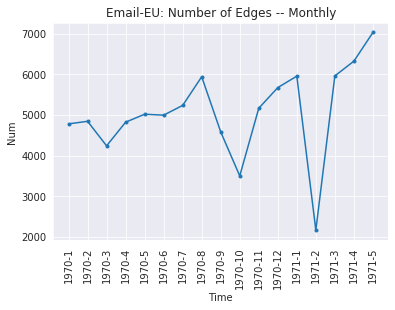

In [72]:
plt.plot(num_edges[:],marker='.')
plt.title("Email-EU: Number of Edges -- Monthly")
plt.xlabel("Time")
plt.ylabel("Num")
plt.xticks(np.arange(len(num_edges),step=1),labels,rotation=90);

In [73]:
with open("email_1_month_dir.pkl", 'wb') as file:
    pickle.dump(G_list[:-2],file) #DISCARDING THE LAST TWO MONTHS b/c low number of edges

## Weekly Snapshots

In [74]:
week = df.groupby([df['date'].dt.year, df["date"].dt.week])
G_list = []
labels = []
for year_num in [1970,1971,1972]:
    for week_num in range(1,54):
            try:
                group = week.get_group((year_num,week_num))
                G = nx.DiGraph()
                G.add_nodes_from(range(0,986+1))
                name = str(week_num)
                labels.append(name)
                for u,v in zip(group['SRC'].tolist(), group['TGT'].tolist()):
                    if G.has_edge(u,v):
                        G[u][v]["weight"] += 1

                    else:    
                        G.add_edge(u,v,weight=1)
                if G.number_of_edges() >100:
                    G_list.append(G)
            except:
                print("No reviews in: {}-{}".format(year_num,week_num))

No reviews in: 1971-24
No reviews in: 1971-25
No reviews in: 1971-26
No reviews in: 1971-27
No reviews in: 1971-28
No reviews in: 1971-29
No reviews in: 1971-30
No reviews in: 1971-31
No reviews in: 1971-32
No reviews in: 1971-33
No reviews in: 1971-34
No reviews in: 1971-35
No reviews in: 1971-36
No reviews in: 1971-37
No reviews in: 1971-38
No reviews in: 1971-39
No reviews in: 1971-40
No reviews in: 1971-41
No reviews in: 1971-42
No reviews in: 1971-43
No reviews in: 1971-44
No reviews in: 1971-45
No reviews in: 1971-46
No reviews in: 1971-47
No reviews in: 1971-48
No reviews in: 1971-49
No reviews in: 1971-50
No reviews in: 1971-51
No reviews in: 1971-52
No reviews in: 1972-1
No reviews in: 1972-2
No reviews in: 1972-3
No reviews in: 1972-4
No reviews in: 1972-5
No reviews in: 1972-6
No reviews in: 1972-7
No reviews in: 1972-8
No reviews in: 1972-9
No reviews in: 1972-12
No reviews in: 1972-13
No reviews in: 1972-14
No reviews in: 1972-15
No reviews in: 1972-16
No reviews in: 1972-

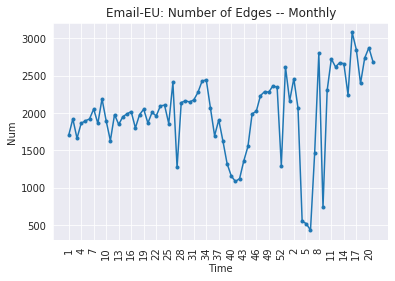

In [75]:
num_edges = [g.number_of_edges() for g in G_list[:-4]]
plt.plot(num_edges[:],marker='.')
plt.title("Email-EU: Number of Edges -- Monthly")
plt.xlabel("Time")
plt.ylabel("Num")
plt.xticks(np.arange(len(num_edges),step=3),labels[::3],rotation=90);

In [76]:
with open("email_1_week_dir.pkl", 'wb') as file:
    pickle.dump(G_list[:-4],file) #DISCARDING THE LAST 4 WEEKS b/c of sudden drop!

## Equal (Weekly) Snapshots

In [77]:
G_list = []

slice_num = 74;
slice_edge_num = int(np.floor(len(df) / slice_num));

for index in range(slice_num):
    G = nx.DiGraph()

    G.add_nodes_from(range(0,986+1))
    
    group = df.iloc[(index * slice_edge_num):(index + 1) * slice_edge_num]
    for u,v in zip(group["SRC"].tolist(), group["TGT"].tolist()):
        if G.has_edge(u,v):
            
            G[u][v]["weight"] += 1
            
        else: 
            G.add_edge(u,v,weight=1)            
    G_list.append(G)

Text(0, 0.5, 'Num')

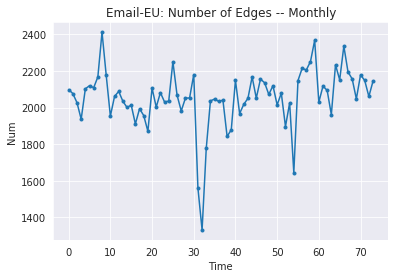

In [78]:
num_edges = [g.number_of_edges() for g in G_list[:]]
plt.plot(num_edges[:],marker='.')
plt.title("Email-EU: Number of Edges -- Monthly")
plt.xlabel("Time")
plt.ylabel("Num")
#plt.xticks(np.arange(len(num_edges),step=3),labels[::3],rotation=90);

In [79]:
with open("email_equal_weekly_dir.pkl", 'wb') as file:
    pickle.dump(G_list,file) #74 snapshots

## Equal (Monthly) Snapshots

In [80]:
with open('email_1_month_dir.pkl','rb') as file:
    xx = pickle.load(file)
len(xx)

17

In [81]:
G_list = []

slice_num = 17;
slice_edge_num = int(np.floor(len(df) / slice_num));

for index in range(slice_num):
    G = nx.DiGraph()

    G.add_nodes_from(range(0,986+1))
    
    group = df.iloc[(index * slice_edge_num):(index + 1) * slice_edge_num]
    for u,v in zip(group["SRC"].tolist(), group["TGT"].tolist()):
        if G.has_edge(u,v):
            
            G[u][v]["weight"] += 1
            
        else: 
            G.add_edge(u,v,weight=1)            
    G_list.append(G)

Text(0.5, 1.0, 'Num of Edges in Equal Months')

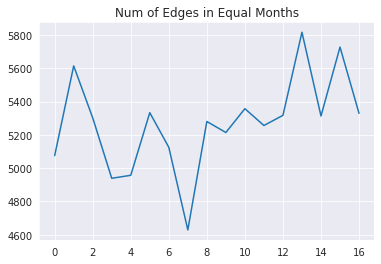

In [82]:
g_len = [len(g.edges) for g in G_list]
plt.plot(g_len)
plt.title("Num of Edges in Equal Months")

In [83]:
with open("email_equal_monthly_dir.pkl", "wb") as file:
    pickle.dump(G_list,file)

## OLD WORK

In [17]:
G_list = []
G_dir_list = []
week_groups = df.groupby("WEEK")

G = nx.Graph()
G_dir = nx.DiGraph()

G.add_nodes_from(range(0,1899))
G_dir.add_nodes_from(range(0,1899))

for e,week in enumerate(weeks):
    print("{}/{}".format(e,len(weeks)))
    
    try:
        group = week_groups.get_group(week)
        for u,v in zip(group["SRC"].tolist(), group["TGT"].tolist()):
            if G.has_edge(u,v):
                G[u][v]["weight"] += 1

                G_dir[u][v]["weight"] += 1
                G_dir[v][u]["weight"] += 1
            else: 
                G.add_edge(u,v,weight=1)
                G_dir.add_edge(u,v,weight=1)
                G_dir.add_edge(v,u,weight=1)
    except:
        print("No messages in {}".format(week))
    G_list.append(copy.deepcopy(G))
    G_dir_list.append(copy.deepcopy(G_dir))

0/28
1/28
2/28
3/28
4/28
5/28
6/28
7/28
8/28
9/28
10/28
11/28
12/28
13/28
14/28
15/28
16/28
17/28
18/28
19/28
20/28
21/28
22/28
23/28
24/28
25/28
26/28
27/28


In [18]:
with open("CollegeMsg/Graphs/msg_1_week_agg_undir.pkl", "wb") as file:
    pickle.dump(G_list,file)
    
with open("CollegeMsg/Graphs/msg_1_week_agg_dir.pkl", "wb") as file:
    pickle.dump(G_dir_list,file)

## 1-month Snapshots

In [19]:
df['MONTH'] = 0
for index, row in df.iterrows():
    row['MONTH'] = datetime.datetime.fromtimestamp(row['UNIXTS']).month

In [20]:
df.head(5)

,SRC,TGT,UNIXTS,WEEK,MONTH
2,4,1,1082414391,17,4
3,5,6,1082439619,17,4
4,7,6,1082439756,17,4
5,8,9,1082440403,17,4
6,8,10,1082440453,17,4


In [21]:
months = sorted(df['MONTH'].unique())

In [22]:
len(months)

7

In [23]:
G_list = []
G_dir_list = []
month_groups = df.groupby("MONTH")


for e,month in enumerate(months):
    print("{}/{}".format(e,len(months)))
    
    G = nx.Graph()
    G_dir = nx.DiGraph()

    G.add_nodes_from(range(0,1899))
    G_dir.add_nodes_from(range(0,1899))
    
    try:
        group = month_groups.get_group(month)
        for u,v in zip(group["SRC"].tolist(), group["TGT"].tolist()):
            if G.has_edge(u,v):
                G[u][v]["weight"] += 1

                G_dir[u][v]["weight"] += 1
                G_dir[v][u]["weight"] += 1
            else: 
                G.add_edge(u,v,weight=1)
                G_dir.add_edge(u,v,weight=1)
                G_dir.add_edge(v,u,weight=1)

    except:
        print("No messages in: ", month)
    G_list.append(G)
    G_dir_list.append(G_dir)

0/7
1/7
2/7
3/7
4/7
5/7
6/7


In [24]:
G_list[6].number_of_nodes()

1899

Text(0.5, 1.0, 'Num of Edges in 1-month Snapshots')

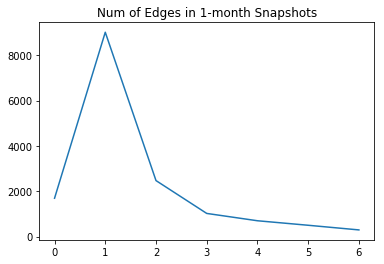

In [25]:
g_len = [len(g.edges) for g in G_list]
plt.plot(g_len)
plt.title("Num of Edges in 1-month Snapshots")

In [26]:
with open("CollegeMsg/Graphs/msg_1_month_undir.pkl", "wb") as file:
    pickle.dump(G_list, file)
    
with open("CollegeMsg/Graphs/msg_1_month_dir.pkl", "wb") as file:
    pickle.dump(G_dir_list,file)

In [27]:
G_list = []
G_dir_list = []
month_groups = df.groupby("MONTH")

G = nx.Graph()
G_dir = nx.DiGraph()

G.add_nodes_from(range(0,1899))
G_dir.add_nodes_from(range(0,1899))

for e,month in enumerate(months):
    print("{}/{}".format(e,len(months)))
    
    try:
        group = month_groups.get_group(month)
        for u,v in zip(group["SRC"].tolist(), group["TGT"].tolist()):
            if G.has_edge(u,v):
                G[u][v]["weight"] += 1

                G_dir[u][v]["weight"] += 1
                G_dir[v][u]["weight"] += 1
            else: 
                G.add_edge(u,v,weight=1)
                G_dir.add_edge(u,v,weight=1)
                G_dir.add_edge(v,u,weight=1)
    except:
        print("No messages in :", month)
    G_list.append(copy.deepcopy(G))
    G_dir_list.append(copy.deepcopy(G_dir))

0/7
1/7
2/7
3/7
4/7
5/7
6/7


In [28]:
with open("CollegeMsg/Graphs/msg_1_month_agg_undir.pkl", "wb") as file:
    pickle.dump(G_list,file)
    
with open("CollegeMsg/Graphs/msg_1_month_agg_dir.pkl", "wb") as file:
    pickle.dump(G_dir_list,file)

In [29]:
len(df)

59833

In [30]:
len(df) / 28

2136.8928571428573

## Equal-edges Snapshots

In [31]:
G_list = []
G_dir_list = []

slice_num = 28;
slice_edge_num = int(np.floor(len(df) / slice_num));

for index in range(slice_num):
    G = nx.Graph()
    G_dir = nx.DiGraph()

    G.add_nodes_from(range(0,1899))
    G_dir.add_nodes_from(range(0,1899))
    
    group = df.iloc[(index * slice_edge_num):(index + 1) * slice_edge_num]
    for u,v in zip(group["SRC"].tolist(), group["TGT"].tolist()):
        if G.has_edge(u,v):
            G[u][v]["weight"] += 1

            G_dir[u][v]["weight"] += 1
            G_dir[v][u]["weight"] += 1
        else: 
            G.add_edge(u,v,weight=1)
            G_dir.add_edge(u,v,weight=1)
            G_dir.add_edge(v,u,weight=1)
            
    G_list.append(G)
    G_dir_list.append(G_dir)

Text(0.5, 1.0, 'Num of Edges in equal-edge Snapshots')

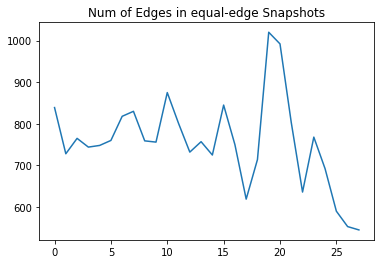

In [32]:
g_len = [len(g.edges) for g in G_list]
plt.plot(g_len)
plt.title("Num of Edges in equal-edge Snapshots")

In [33]:
df.tail(5)

,SRC,TGT,UNIXTS,WEEK,MONTH
59830,1898,1846,1098776648,44,10
59831,1898,1096,1098776836,44,10
59832,1898,276,1098777003,44,10
59833,1877,1623,1098777111,44,10
59834,1877,1623,1098777142,44,10


In [34]:
with open("CollegeMsg/Graphs/msg_equal_edge_undir.pkl", "wb") as file:
    pickle.dump(G_list, file)
    
with open("CollegeMsg/Graphs/msg_equal_edge_dir.pkl", "wb") as file:
    pickle.dump(G_dir_list,file)

## Equal-edges Aggregates

In [35]:
G_list = []
G_dir_list = []

G = nx.Graph()
G_dir = nx.DiGraph()

G.add_nodes_from(range(0,1899))
G_dir.add_nodes_from(range(0,1899))

slice_num = 28;
slice_edge_num = int(np.floor(len(df) / slice_num));

for index in range(slice_num):
    G.add_nodes_from(range(0,1899))
    G_dir.add_nodes_from(range(0,1899))
    
    group = df.iloc[(index * slice_edge_num):(index + 1) * slice_edge_num]
    for u,v in zip(group["SRC"].tolist(), group["TGT"].tolist()):
        if G.has_edge(u,v):
            G[u][v]["weight"] += 1

            G_dir[u][v]["weight"] += 1
            G_dir[v][u]["weight"] += 1
        else: 
            G.add_edge(u,v,weight=1)
            G_dir.add_edge(u,v,weight=1)
            G_dir.add_edge(v,u,weight=1)
            
    G_list.append(copy.deepcopy(G))
    G_dir_list.append(copy.deepcopy(G_dir))

Text(0.5, 1.0, 'Num of Edges in equal-edge Aggregates')

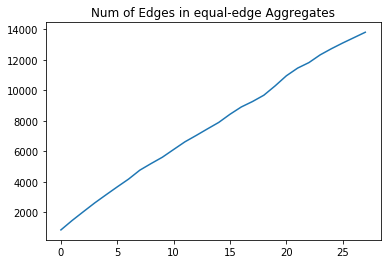

In [36]:
g_len = [len(g.edges) for g in G_list]
plt.plot(g_len)
plt.title("Num of Edges in equal-edge Aggregates")

In [37]:
with open("CollegeMsg/Graphs/msg_equal_edge_agg_undir.pkl", "wb") as file:
    pickle.dump(G_list, file)
    
with open("CollegeMsg/Graphs/msg_equal_edge_agg_dir.pkl", "wb") as file:
    pickle.dump(G_dir_list,file)